# OCR Dataset Generator: Step-by-Step Pipeline

This notebook walks through the degradation pipeline incrementally: clear text -> gaussian noise -> speckle -> salt & pepper -> blur -> filters -> rotation.


In [1]:
import os
import random
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.append('../')

from src.generate_clear_text_images import generate_clear_text_images
from src.image_ops import (
    GaussianNoiseOperation,
    SpeckleOperation,
    SaltPepperOperation,
    GaussianBlurOperation,
    BoxBlurOperation,
    MaxFilterOperation,
    MinFilterOperation,
    RotateOperation
)

random.seed(1)
np.random.seed(1)

def show_image(image: np.ndarray, title: str = None) -> None:
    plt.figure(figsize=(4, 3))
    if image.ndim == 2:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.axis("off")
    plt.show()


## 1) Generate a single clear text image


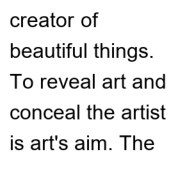

In [2]:
output_dir = Path("output") / "artifacts"
generate_clear_text_images(
    text_file_path="../data/The_Picture_of_Dorian_Gray.txt",
    output_dir=str(output_dir),
    num_images=2,
    font_size=32
)

image_path = output_dir / "images" / "clear_image_00001.png"
clear_image = np.array(Image.open(image_path).convert("RGB"))
show_image(clear_image)


## 2) Gaussian noise


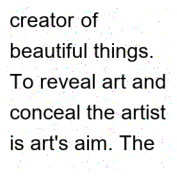

In [3]:
gaussian_noise = GaussianNoiseOperation(mean=0.8, stddev=0.07)(clear_image)
show_image(gaussian_noise)


## 3) Speckle noise


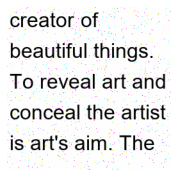

In [4]:
speckle_noise = SpeckleOperation(mean=0.0, stddev=0.0015)(gaussian_noise)
show_image(speckle_noise)


## 4) Salt & pepper noise


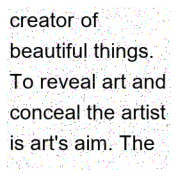

In [5]:
salt_pepper = SaltPepperOperation(salt_vs_pepper=0.5, amount=0.01)(speckle_noise)
show_image(salt_pepper)


## 5) Gaussian blur


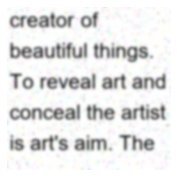

In [6]:
gaussian_blur = GaussianBlurOperation(radius=2)(salt_pepper)
show_image(gaussian_blur)


## 6) Box blur


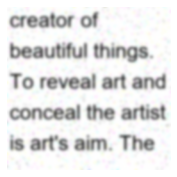

In [7]:
box_blur = BoxBlurOperation(radius=1)(gaussian_blur)
show_image(box_blur)


## 7) Max filter


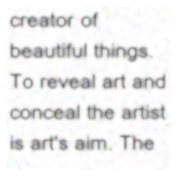

In [8]:
max_filtered = MaxFilterOperation(radius=3)(box_blur)
show_image(max_filtered)


## 8) Min filter


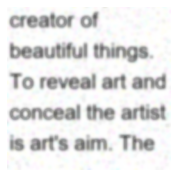

In [9]:
min_filtered = MinFilterOperation(radius=3)(max_filtered)
show_image(min_filtered)


## 9) Rotation


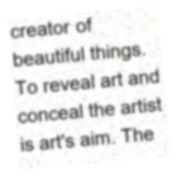

In [10]:
rotated = RotateOperation(angle=5, center=(min_filtered.shape[1] // 2, min_filtered.shape[0] // 2))(min_filtered)
show_image(rotated)
